# Probabilistic Information

## Stock Price Action: 
Open, High, Low, Close, Adjust close ,Trade Volume

## Stock Probability analysis data: 
RSI, MACD, Bollinger, DMA, Volume Delta, Rate change 

## economy data:
Unemployment rate and Price index per Month

## News data: 
Last 100 News per each stock with analyzer of the good whether it's good or bad 

## Analyzed stocks:
- AAPl
- AZN
- BA
- DIS
- JPM
- MSFT
- NVDA
- PFE
- TSLA
- WMT 


In [44]:
# Import libraries
import yfinance as yf
import numpy as np
from stockstats import StockDataFrame as Sdf
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import pandas as pd 
from math import exp
from math import sqrt
from math import pi
import sklearn.mixture as mix
import quandl
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.dates import YearLocator, MonthLocator
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import nltk
from pandas import read_csv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib.pyplot import figure
gnb = GaussianNB()
quandl.ApiConfig.api_key = "tgJvn_S9mLsWRyVsbMzy"

In [21]:
unemployment = quandl.get(["FRED/UNRATE"],
    trim_start="2015-01-01", trim_end="2020-11-01", collapse = 'monthly')
unemployment.columns = ['Unemployment']
Price_index = quandl.get(["FRED/CUUR0000SA0R"],\
    trim_start="2015-01-01", trim_end="2020-12-01", collapse = 'monthly')
Price_index.columns = ['Consumer Price Index']

##### Stock Data

In [22]:
def stock_name(stock_name):
    data = yf.download(stock_name,'2015-01-01','2020-12-01')
    data = data.dropna()
    data=Sdf.retype(data)
    data['macd']=data['macd'] #macd s is 26 avr and h is 12 ave
    data['boll']=data['boll'] #upper boll
    data['boll_lb']=data['boll_lb'] #middle STD
    data['boll_lb']=data['boll_lb'] #lower boll
    data['volume_delta']=data['volume_delta'] #volume compared to yesterday
    data['dma']=data['dma'] #diff between 10 and 50 moving avg
#   data['close_-1_r'] = data['close_-1_r']  #price change in rate
    data = pd.concat([Price_index,unemployment, data], axis=1)
    data = data.fillna(method='ffill')
    data = data.fillna(method='bfill')
    data = data.iloc[3:]
    difference = data.diff(axis=0);
    difference['Consumer Price Index'] = difference['Consumer Price Index'].replace(to_replace=0, method='ffill').values
    difference['Unemployment'] = difference['Unemployment'].replace(to_replace=0, method='ffill').values
    difference = difference.dropna()
    
    def conditions(difference):
        if (difference['Consumer Price Index'] > 0):
            return 0
        else:
            return 1
    difference['Consumer Price Index'] = difference.apply(conditions, axis=1)
    
    def conditions(difference):
        if (difference['Unemployment'] > 0):
            return 0
        else:
            return 1
    difference['Unemployment'] = difference.apply(conditions, axis=1)    
    
    def conditions(difference):
        if (difference['open'] > 0):
            return 1
        else:
            return 0
    difference['open'] = difference.apply(conditions, axis=1)    
    
    def conditions(difference):
        if (difference['high'] > 0):
            return 1
        else:
            return 0
    difference['high'] = difference.apply(conditions, axis=1)    
    
    
    def conditions(difference):
        if (difference['low'] > 0):
            return 1
        else:
            return 0
    difference['low'] = difference.apply(conditions, axis=1)    
    
    def conditions(difference):
        if (difference['close'] > 0):
            return 1
        else:
            return 0
    difference['close'] = difference.apply(conditions, axis=1)        
    
    def conditions(difference):
        if (difference['adj close'] > 0):
            return 1
        else:
            return 0
    difference['adj close'] = difference.apply(conditions, axis=1)        
    
    def conditions(difference):
        if (difference['volume'] > 0):
            return 1
        else:
            return 0
    difference['volume'] = difference.apply(conditions, axis=1)        
    
    def conditions(difference):
        if (difference['macd'] > 0):
            return 1
        else:
            return 0
    difference['macd'] = difference.apply(conditions, axis=1)        
        
    def conditions(difference):
        if (difference['macds'] > 0):
            return 1
        else:
            return 0
    difference['macds'] = difference.apply(conditions, axis=1)    
    
    def conditions(difference):
        if (difference['macds'] > 0):
            return 1
        else:
            return 0
    difference['macds'] = difference.apply(conditions, axis=1)    

    def conditions(difference):
        if (difference['macdh'] > 0):
            return 1
        else:
            return 0
    difference['macdh'] = difference.apply(conditions, axis=1)    

    def conditions(difference):
        if (difference['close_20_sma'] > 0):
            return 1
        else:
            return 0
    difference['close_20_sma'] = difference.apply(conditions, axis=1)    
    
    def conditions(difference):
        if (difference['close_20_mstd'] > 0):
            return 1
        else:
            return 0
    difference['close_20_mstd'] = difference.apply(conditions, axis=1)        

    def conditions(difference):
        if (difference['boll'] > 0):
            return 1
        else:
            return 0
    difference['boll'] = difference.apply(conditions, axis=1)        

    def conditions(difference):
        if (difference['boll_ub'] > 0):
            return 1
        else:
            return 0
    difference['boll_ub'] = difference.apply(conditions, axis=1)        
    
    def conditions(difference):
        if (difference['boll_lb'] > 0):
            return 1
        else:
            return 0
    difference['boll_lb'] = difference.apply(conditions, axis=1)        
    
    def conditions(difference):
        if (difference['volume_delta'] > 0):
            return 1
        else:
            return 0
    difference['volume_delta'] = difference.apply(conditions, axis=1)        

    def conditions(difference):
        if (difference['close_10_sma'] > 0):
            return 1
        else:
            return 0
    difference['close_10_sma'] = difference.apply(conditions, axis=1)        

    
    def conditions(difference):
        if (difference['close_50_sma'] > 0):
            return 1
        else:
            return 0
    difference['close_50_sma'] = difference.apply(conditions, axis=1)        
    
    def conditions(difference):
        if (difference['dma'] > 0):
            return 1
        else:
            return 0
    difference['dma'] = difference.apply(conditions, axis=1)   
    difference = difference[ [ col for col in difference.columns if col != 'adj close' ] + ['adj close'] ]

    difference['Consumer Price Index'] =  difference['Consumer Price Index'].shift(-1)
    difference['Unemployment'] = difference.Unemployment.shift(-1)
    difference['open'] = difference.open.shift(-1)
    difference['low'] = difference.low.shift(-1)
    difference['high'] = difference.high.shift(-1)
    difference['close'] = difference.close.shift(-1)
    difference['volume'] = difference.volume.shift(-1)
    difference['macd'] = difference.macd.shift(-1)
    difference['macdh'] = difference.macdh.shift(-1)
    difference['macds'] = difference.macds.shift(-1)
    difference['close_20_sma'] = difference.close_20_sma.shift(-1)
    difference['boll'] = difference.boll.shift(-1)
    difference['boll_ub'] = difference.boll_ub.shift(-1)
    difference['boll_lb'] = difference.boll_lb.shift(-1)
    difference['close_20_mstd'] = difference.close_20_mstd.shift(-1)
    difference['volume_delta'] = difference.volume_delta.shift(-1)
    difference['close_10_sma'] = difference.close_10_sma.shift(-1)
    difference['close_50_sma'] = difference.close_50_sma.shift(-1)
    difference['dma'] = difference.dma.shift(-1)
    difference = difference.dropna()
    return difference


In [23]:
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

#Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
 
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities
 
# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label
 
# Naive Bayes Algorithm
def naive_bayes(train, test):
    summarize = summarize_by_class(train)
    predictions = list()
    for row in test:
        output = predict(summarize, row)
        predictions.append(output)
    return(predictions)

In [24]:
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

#Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
 
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities
 
# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label
 
# Naive Bayes Algorithm
def naive_bayes(train, test):
    summarize = summarize_by_class(train)
    predictions = list()
    for row in test:
        output = predict(summarize, row)
        predictions.append(output)
    return(predictions)

In [25]:
def Bay_model_test(stock_name):
    train = stock_name['2015-02-28':'2017-12-19']
    test  = stock_name['2017-12-20':]
    X_train = train[[col for col in train.columns if col != 'adj close']]
    X_test  = test[[col for col in train.columns if col != 'adj close']]
    y_train = train['adj close']
    y_test  = test['adj close']
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    y_pred = pd.DataFrame(y_pred)
    y_pred = y_pred.set_index(y_test.index)
    y_pred = y_pred.rename(columns = {0:"Class"}) 

    return y_pred

In [26]:
def Bay_model(stock_name):
    train = stock_name['2015-02-28':'2017-12-19']
    test  = stock_name['2017-12-20':]
    X_train = train[[col for col in train.columns if col != 'adj close']]
    X_test  = test[[col for col in train.columns if col != 'adj close']]
    y_train = train['adj close']
    y_test  = test['adj close']
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    accuracy  = metrics.accuracy_score(y_test, y_pred)
    return accuracy

In [27]:
AAPl = stock_name("AAPl")

[*********************100%***********************]  1 of 1 completed


In [28]:
AZN = stock_name("AZN")

[*********************100%***********************]  1 of 1 completed


In [29]:
DIS = stock_name("DIS")

[*********************100%***********************]  1 of 1 completed


In [30]:
BA = stock_name("BA")

[*********************100%***********************]  1 of 1 completed


In [31]:
JPM = stock_name("JPM")

[*********************100%***********************]  1 of 1 completed


In [32]:
MSFT = stock_name("MSFT")

[*********************100%***********************]  1 of 1 completed


In [33]:
NVDA = stock_name("NVDA")

[*********************100%***********************]  1 of 1 completed


In [34]:
PFE = stock_name("PFE")

[*********************100%***********************]  1 of 1 completed


In [35]:
TSLA = stock_name("TSLA")

[*********************100%***********************]  1 of 1 completed


In [36]:
WMT = stock_name("WMT")

[*********************100%***********************]  1 of 1 completed


In [37]:
dataset = AAPl.to_numpy()

In [45]:
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[0])

In [46]:
summaries

{0.0: [(0.8176638176638177, 0.3863966619949153, 702),
  (0.7065527065527065, 0.45566627167371443, 702),
  (0.27492877492877493, 0.4467967245143211, 702),
  (0.36324786324786323, 0.4812783068678863, 702),
  (0.42592592592592593, 0.4948351620353141, 702),
  (0.5384615384615384, 0.498873965229059, 702),
  (0.4672364672364672, 0.499281136225514, 702),
  (0.3504273504273504, 0.47744396687445095, 702),
  (0.4131054131054131, 0.49274252187782364, 702),
  (0.36324786324786323, 0.4812783068678863, 702),
  (0.5641025641025641, 0.4962274003238993, 702),
  (0.45726495726495725, 0.4985255703052166, 702),
  (0.5641025641025641, 0.4962274003238993, 702),
  (0.50997150997151, 0.500256994481936, 702),
  (0.5655270655270656, 0.4960410384433, 702),
  (0.50997150997151, 0.5002569944819357, 702),
  (0.5056980056980057, 0.5003240148107064, 702),
  (0.6467236467236467, 0.4783284381091562, 702),
  (0.41595441595441596, 0.4932371606390256, 702)],
 1.0: [(0.833116036505867, 0.373115548277628, 767),
  (0.7183833

In [47]:
print("APPLE:",Bay_model(AAPl))
print("Astrazenca:",Bay_model(AZN))
print("Diseny:",Bay_model(DIS))
print("Boeing:",Bay_model(BA))
print("JP Morgen:",Bay_model(JPM))
print("Microsoft:",Bay_model(MSFT))
print("NEVDIA:",Bay_model(NVDA))
print("Pfizer:",Bay_model(PFE))
print("Tesla:",Bay_model(TSLA))
print("Walmart:",Bay_model(WMT))

APPLE: 0.7217043941411452
Astrazenca: 0.625832223701731
Diseny: 0.7043941411451398
Boeing: 0.6950732356857523
JP Morgen: 0.6924101198402131
Microsoft: 0.6964047936085219
NEVDIA: 0.7070572569906791
Pfizer: 0.7017310252996005
Tesla: 0.7137150466045273
Walmart: 0.715046604527297


In [48]:
data = yf.download("AAPL",'2017-12-20','2020-11-28')
data = data.drop(columns=['Open','High','Low','Close','Volume']) 
data1 = Bay_model_test(AAPl)
data11 = pd.concat([data,data1], axis=1)
data11

[*********************100%***********************]  1 of 1 completed


,Adj Close,Class
Date,,
2017-12-20,41.944889,1
2017-12-21,42.103676,1
2017-12-22,42.103676,0
2017-12-26,41.035507,0
2017-12-27,41.042721,1
...,...,...
2020-11-20,117.339996,0
2020-11-23,113.849998,0
2020-11-24,115.169998,1


C:\Users\Afify\anaconda3\envs\PythonCPU\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


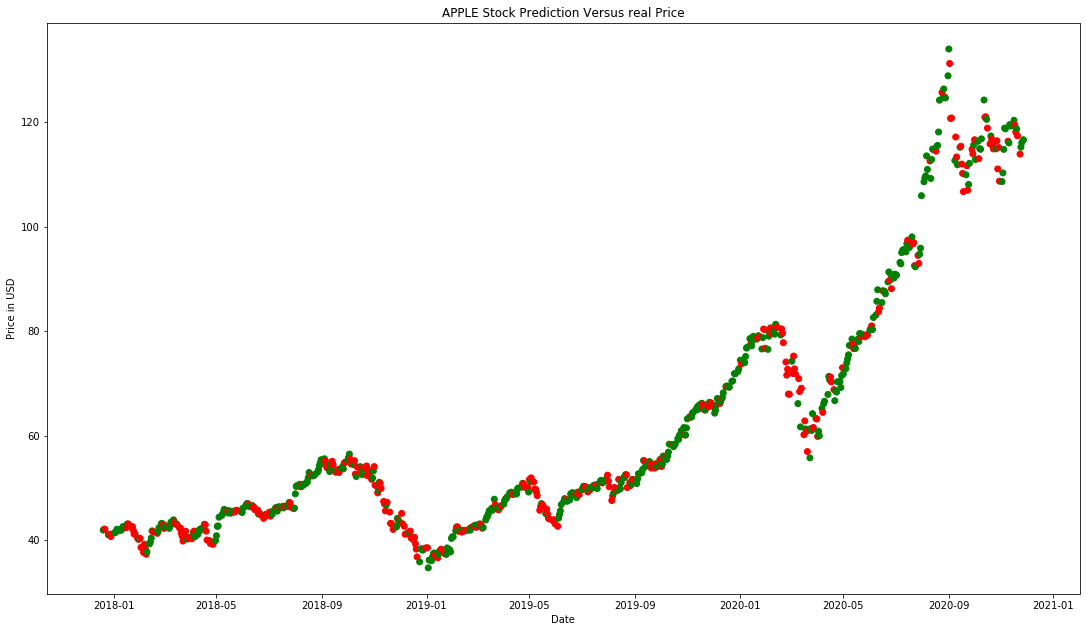

In [49]:
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots()
title='APPLE Stock Prediction Versus real Price'
ylabel='Price in USD'
xlabel='Date'
fig.set_size_inches(18.5, 10.5)
colors = {0:'red', 1:'green'}
ax.scatter(data11.index, data11['Adj Close'], c=data11['Class'].apply(lambda x: colors[x]))
ax.set(xlabel=xlabel, ylabel=ylabel,title=title);

plt.show()

In [50]:
data = yf.download("TSLA",'2017-12-20','2020-11-28')
data = data.drop(columns=['Open','High','Low','Close','Volume']) 
data1 = Bay_model_test(AAPl)
data11 = pd.concat([data,data1], axis=1)
data11

[*********************100%***********************]  1 of 1 completed


,Adj Close,Class
Date,,
2017-12-20,65.795998,1
2017-12-21,66.332001,1
2017-12-22,65.040001,0
2017-12-26,63.458000,0
2017-12-27,62.327999,1
...,...,...
2020-11-20,489.609985,0
2020-11-23,521.849976,0
2020-11-24,555.380005,1


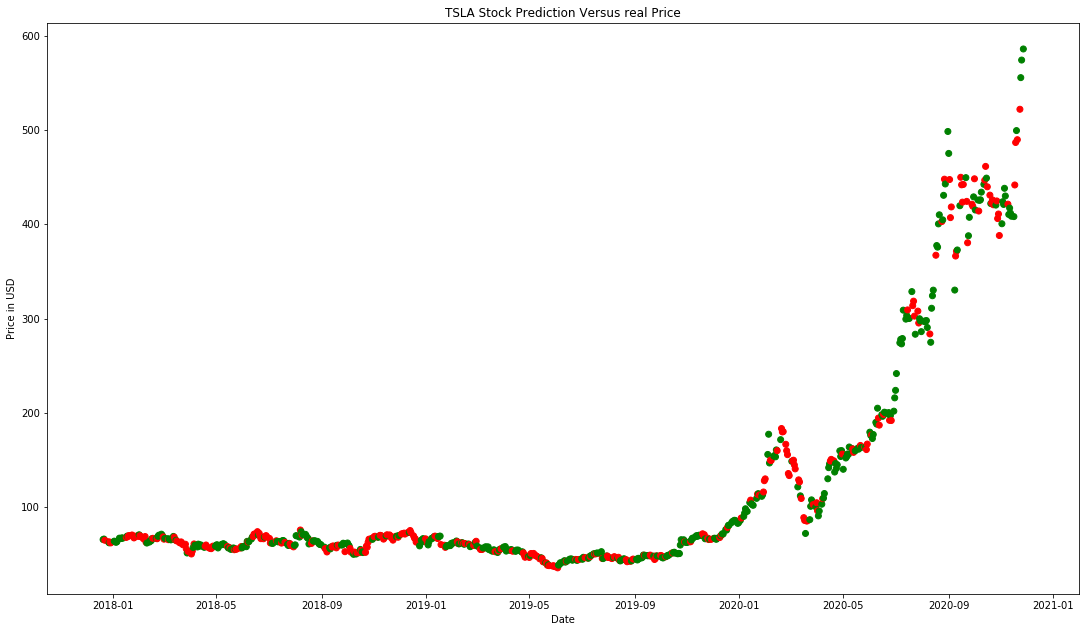

In [51]:
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots()
title='TSLA Stock Prediction Versus real Price'
ylabel='Price in USD'
xlabel='Date'
fig.set_size_inches(18.5, 10.5)
colors = {0:'red', 1:'green'}
ax.scatter(data11.index, data11['Adj Close'], c=data11['Class'].apply(lambda x: colors[x]))
ax.set(xlabel=xlabel, ylabel=ylabel,title=title);

plt.show()

In [53]:
data = yf.download("AZN",'2017-12-20','2020-11-28')
data = data.drop(columns=['Open','High','Low','Close','Volume']) 
data1 = Bay_model_test(AAPl)
data11 = pd.concat([data,data1], axis=1)
data11

[*********************100%***********************]  1 of 1 completed


,Adj Close,Class
Date,,
2017-12-20,29.850677,1
2017-12-21,30.239527,1
2017-12-22,30.393259,0
2017-12-26,30.429428,0
2017-12-27,30.492731,1
...,...,...
2020-11-20,55.299999,0
2020-11-23,54.700001,0
2020-11-24,53.570000,1


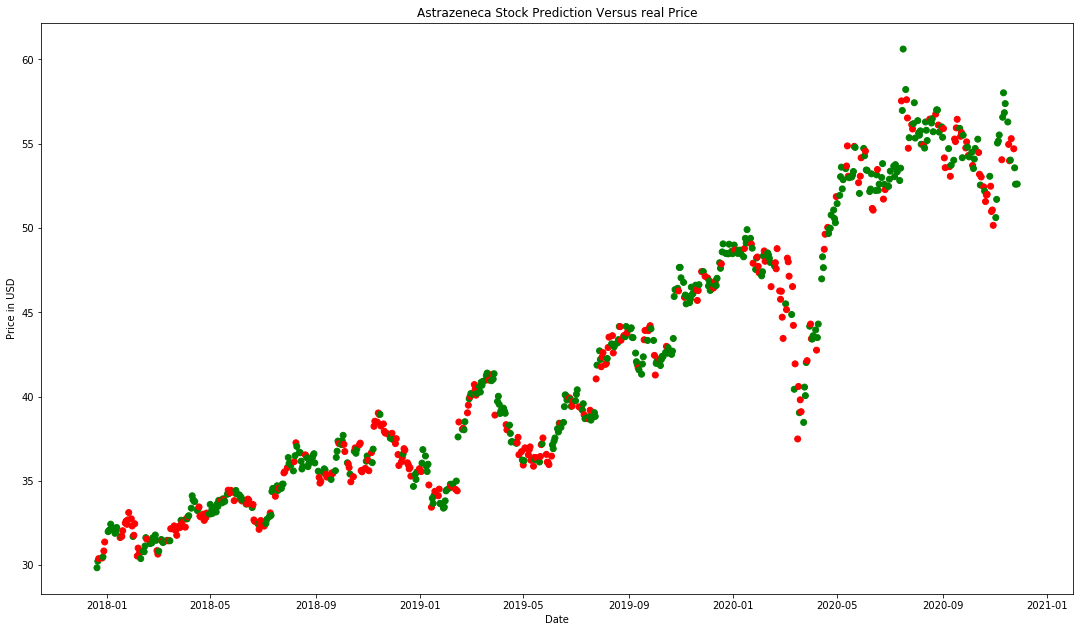

In [54]:
import matplotlib.pyplot as plt
import pandas as pd


fig, ax = plt.subplots()
title='Astrazeneca Stock Prediction Versus real Price'
ylabel='Price in USD'
xlabel='Date'
fig.set_size_inches(18.5, 10.5)
colors = {0:'red', 1:'green'}
ax.scatter(data11.index, data11['Adj Close'], c=data11['Class'].apply(lambda x: colors[x]))
ax.set(xlabel=xlabel, ylabel=ylabel,title=title);

plt.show()

In [62]:
data = yf.download("SRNE",'2020-01-01','2020-12-01')
X_train = data['2020-01-01':'2020-02-19']
X_test  = data['2017-02-20':]


model = mix.GaussianMixture(n_components=4, 
                            covariance_type="full", 
                            n_init=100, 
                            random_state=7).fit(X_train)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X_test)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covariances_[i]))
    print()

#X_train = train[[col for col in train.columns if col != 'adj close']]
#X_test  = test[[col for col in train.columns if col != 'adj close']]
#y_train = train['adj close']
#y_test  = test['adj close']

model = mix.GaussianMixture(n_components=3, 
                            covariance_type="full", 
                            n_init=100, 
                            random_state=7).fit(X_train)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X_test)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covariances_[i]))
    print()

[*********************100%***********************]  1 of 1 completed
Means and vars of each hidden state
0th hidden state
mean =  [3.58846150e+00 3.68269227e+00 3.47499999e+00 3.56807692e+00
 3.56807692e+00 3.10203857e+06]
var =  [2.85344781e-01 3.00759119e-01 2.73856820e-01 3.04655026e-01
 3.04655026e-01 8.98320512e+11]

1th hidden state
mean =  [5.07999992e+00 5.09000015e+00 4.40000010e+00 4.76000023e+00
 4.76000023e+00 4.83388000e+07]
var =  [1.00000000e-06 1.00000000e-06 1.00000000e-06 1.00000000e-06
 1.00000000e-06 1.00000001e-06]

2th hidden state
mean =  [3.82999992e+00 3.90999985e+00 3.40500009e+00 3.56499994e+00
 3.56499994e+00 1.04150000e+07]
var =  [3.13600936e-01 3.36400911e-01 2.55025995e-01 3.78225865e-01
 3.78225865e-01 9.66878890e+11]

3th hidden state
mean =  [3.75250013e+00 3.85000010e+00 3.50250009e+00 3.64500010e+00
 3.64500010e+00 6.95167518e+06]
var =  [3.24669629e-01 3.51950753e-01 2.47269679e-01 3.46225876e-01
 3.46225876e-01 5.29109054e+11]

Means and vars of e

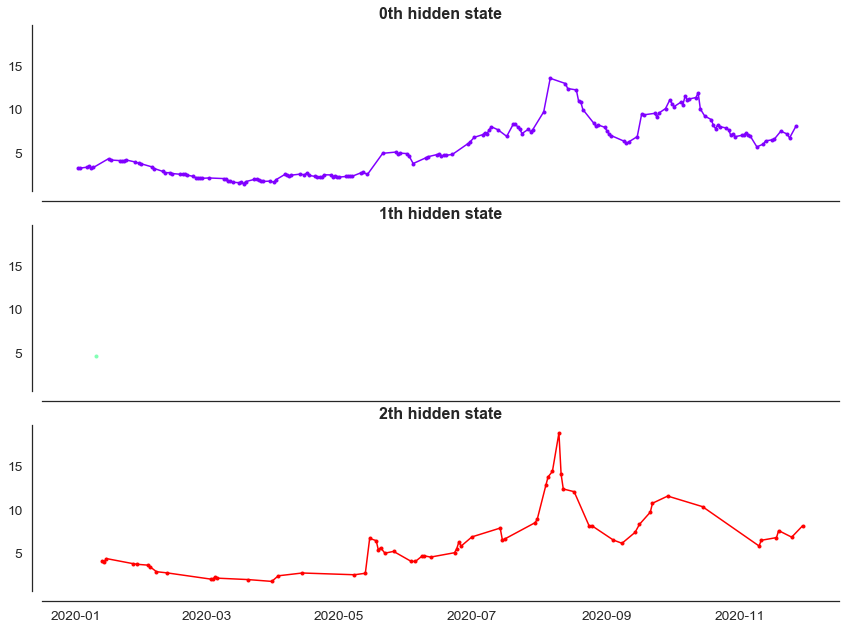

In [63]:
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3, 'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(12,9))
colors = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(X_test.index.values[mask],
                 X_test["Adj Close"].values[mask],
                 ".-", c=color)
    ax.set_title("{0}th hidden state".format(i), fontsize=16, fontweight='demi')

    # Format the ticks.
    #ax.xaxis.set_major_locator(YearLocator())
    #ax.xaxis.set_minor_locator(MonthLocator())
    sns.despine(offset=10)

plt.tight_layout()

Text(0.5, 0.98, 'Stock analysis')

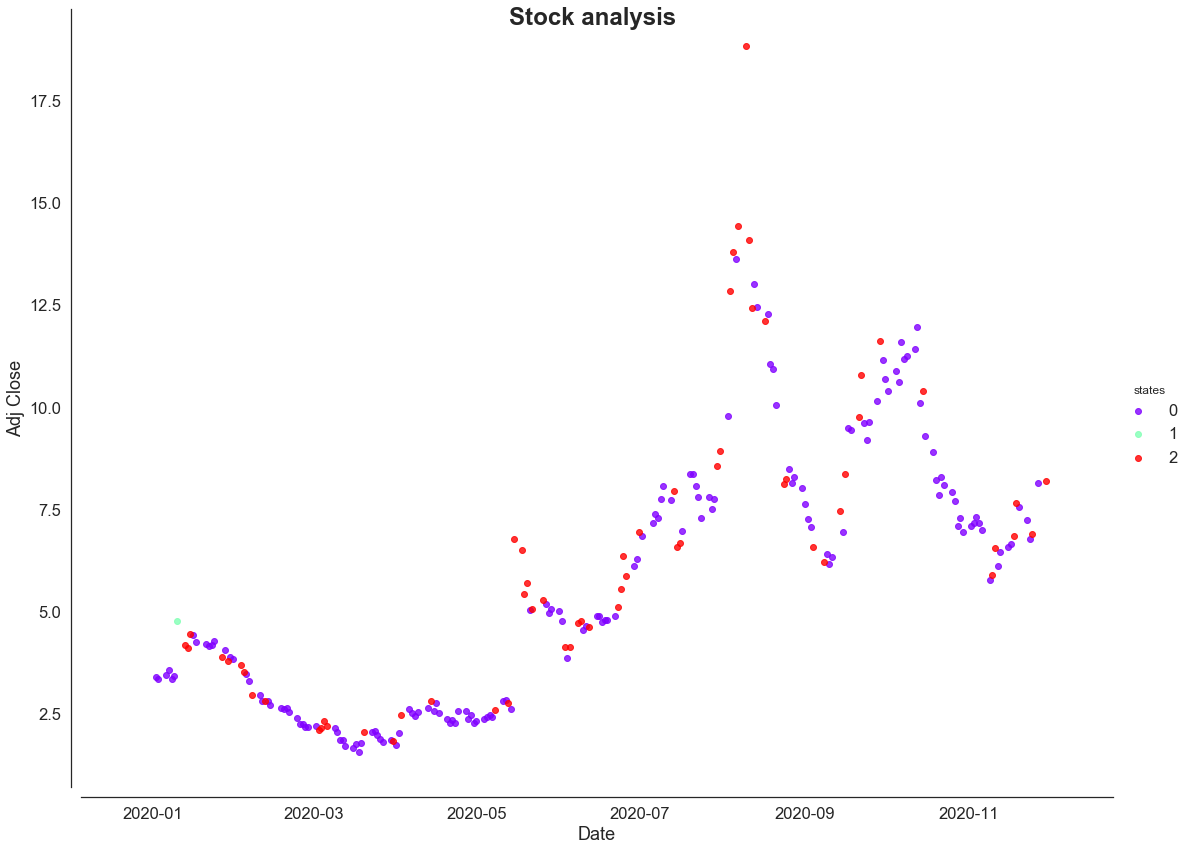

In [64]:
sns.set(font_scale=1.5)
states = (pd.DataFrame(hidden_states, columns=['states'], index=X_test.index)
          .join(X_test, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
states.head()

#suppressing warnings because of some issues with the font package
#in general, would not rec turning off warnings.
import warnings
warnings.filterwarnings("ignore")

sns.set_style('white', style_kwds)
order = [0, 1, 2]
fg = sns.FacetGrid(data=states, hue='states', hue_order=order,
                   palette=colors, aspect=1.31, height=12)
fg.map(plt.scatter, 'Date', "Adj Close", alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Stock analysis', fontsize=24, fontweight='demi')

In [65]:
data = yf.download("AAPL",'2020-01-01','2020-12-01')
X_train = data['2020-01-01':'2020-02-19']
X_test  = data['2017-02-20':]


model = mix.GaussianMixture(n_components=4, 
                            covariance_type="full", 
                            n_init=100, 
                            random_state=7).fit(X_train)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X_test)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covariances_[i]))
    print()

#X_train = train[[col for col in train.columns if col != 'adj close']]
#X_test  = test[[col for col in train.columns if col != 'adj close']]
#y_train = train['adj close']
#y_test  = test['adj close']

model = mix.GaussianMixture(n_components=3, 
                            covariance_type="full", 
                            n_init=100, 
                            random_state=7).fit(X_train)

# Predict the optimal sequence of internal hidden state
hidden_states = model.predict(X_test)

print("Means and vars of each hidden state")
for i in range(model.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", model.means_[i])
    print("var = ", np.diag(model.covariances_[i]))
    print()

[*********************100%***********************]  1 of 1 completed
Means and vars of each hidden state
0th hidden state
mean =  [8.01818314e+01 8.08929666e+01 7.97704447e+01 8.04567414e+01
 7.99168032e+01 1.01785081e+08]
var =  [6.95024538e-01 4.44739667e-01 5.57603357e-01 7.15180235e-01
 8.06030451e-01 1.30475349e+14]

1th hidden state
mean =  [7.77589365e+01 7.88048092e+01 7.71734738e+01 7.81857974e+01
 7.75478068e+01 1.63799403e+08]
var =  [1.19250992e+00 7.71410218e-01 1.27344448e+00 1.08502993e+00
 1.16896549e+00 4.68730681e+13]

2th hidden state
mean =  [8.06725006e+01 8.13162498e+01 7.87087517e+01 7.92312508e+01
 7.85528679e+01 2.07908800e+08]
var =  [1.93603148e-01 4.17642232e-01 2.67731356e+00 3.43638384e+00
 3.37780088e+00 6.92290562e+13]

3th hidden state
mean =  [7.76367947e+01 7.84881344e+01 7.71949315e+01 7.81113133e+01
 7.74425170e+01 1.25664964e+08]
var =  [6.17615858e+00 5.25722066e+00 5.42358885e+00 5.38206134e+00
 5.29029197e+00 1.93103081e+14]

Means and vars of e

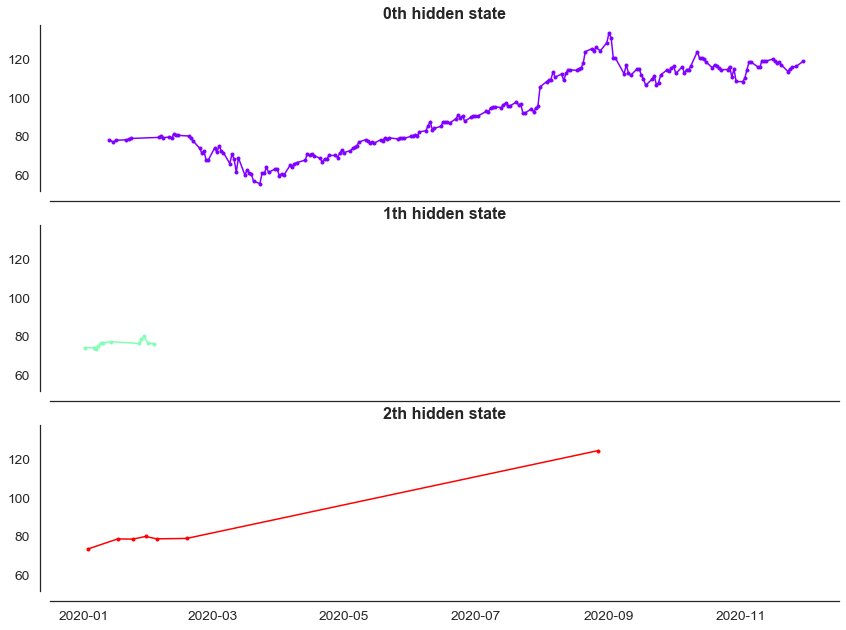

In [66]:
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3, 'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(model.n_components, sharex=True, sharey=True, figsize=(12,9))
colors = cm.rainbow(np.linspace(0, 1, model.n_components))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # Use fancy indexing to plot data in each state.
    mask = hidden_states == i
    ax.plot_date(X_test.index.values[mask],
                 X_test["Adj Close"].values[mask],
                 ".-", c=color)
    ax.set_title("{0}th hidden state".format(i), fontsize=16, fontweight='demi')

    # Format the ticks.
    #ax.xaxis.set_major_locator(YearLocator())
    #ax.xaxis.set_minor_locator(MonthLocator())
    sns.despine(offset=10)

plt.tight_layout()

Text(0.5, 0.98, 'Stock analysis')

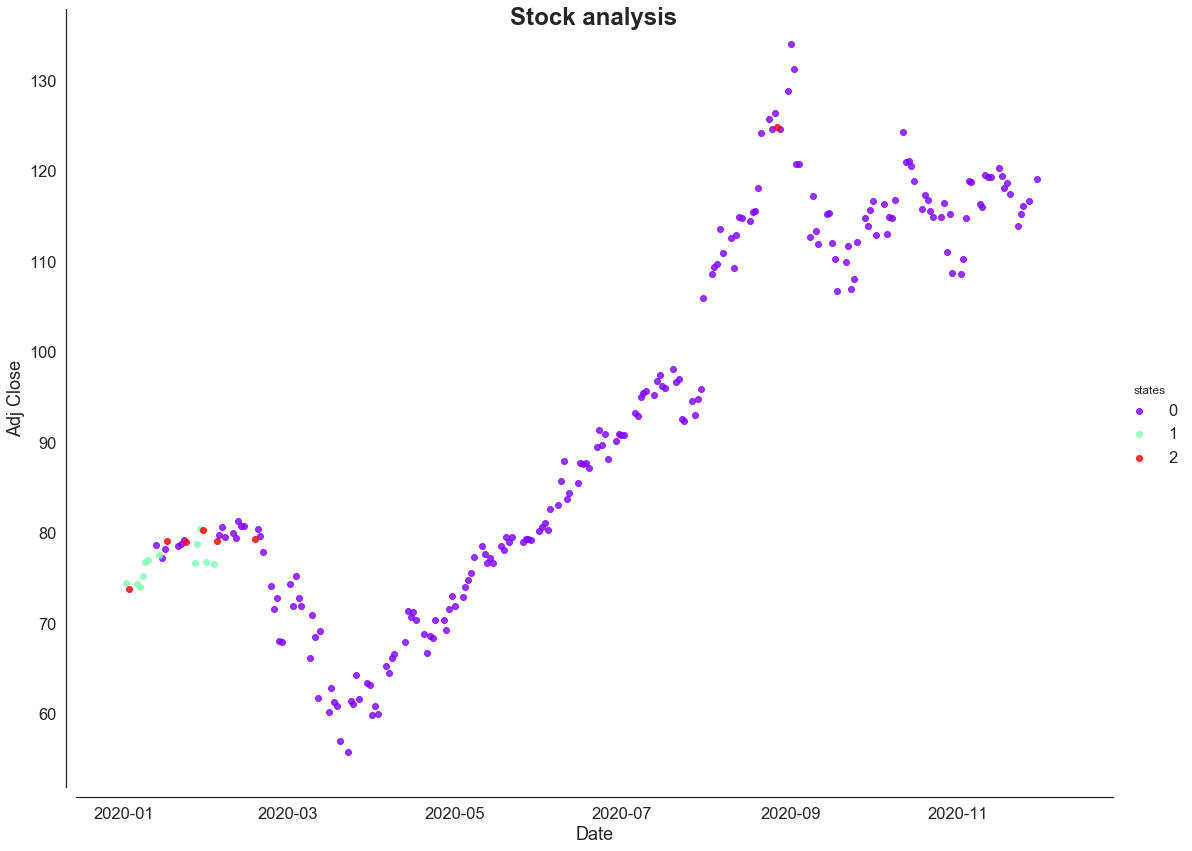

In [67]:
sns.set(font_scale=1.5)
states = (pd.DataFrame(hidden_states, columns=['states'], index=X_test.index)
          .join(X_test, how='inner')
          .reset_index(drop=False)
          .rename(columns={'index':'Date'}))
states.head()

#suppressing warnings because of some issues with the font package
#in general, would not rec turning off warnings.
import warnings
warnings.filterwarnings("ignore")

sns.set_style('white', style_kwds)
order = [0, 1, 2]
fg = sns.FacetGrid(data=states, hue='states', hue_order=order,
                   palette=colors, aspect=1.31, height=12)
fg.map(plt.scatter, 'Date', "Adj Close", alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle('Stock analysis', fontsize=24, fontweight='demi')